# Libraries

In [1]:
import warnings
warnings.filterwarnings( 'ignore' )

In [24]:
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Built-in libraries
#
import time
import pandas as pd
import numpy  as np


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# Visualization libraries
#
import matplotlib.pyplot     as plt
import seaborn               as sns


# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
# User libraries
#
from utils.Outlier_detection import *

# Import data

In [25]:
# Start timer
#
start = time.time()

# Load data
#
df = pd.read_csv('Data/feeds.csv', 
                 sep = ',')


# Rename columns
#
df = df.rename(columns = {'field1' : 'Temperature',
                          'field2' : 'Humidity',
                          'field3' : 'PM2.5',
                          'field4' : 'PM10',
                          'field5' : 'NO2',
                          'field6' : 'CO',
                          'field7' : 'NH4',})



# End timer
#
print('[INFO] Time: %.2f' % (time.time() - start))

df.head( 3 )

[INFO] Time: 0.56


,created_at,entry_id,Temperature,Humidity,PM2.5,PM10,NO2,CO,NH4,latitude,longitude,elevation,status
0,2022-01-27T16:12:40+00:00,1,26.5,17.0,0.5,0.5,75.0,298.0,NaN,NaN,NaN,NaN,NaN
1,2022-01-27T16:12:56+00:00,2,26.7,17.0,0.5,0.5,75.0,298.0,NaN,NaN,NaN,NaN,NaN
2,2022-01-27T16:13:13+00:00,3,26.8,17.0,0.5,0.5,76.0,298.0,NaN,NaN,NaN,NaN,NaN


## Preprocess

In [26]:
# Rename 'created_at' to 'Date
#
df = df.rename(columns = {'created_at':'Date'})

# Set 'Date' as index
#
df['Date'] = df['Date'].astype('datetime64')
df.set_index('Date', inplace=True)

# Keep data after Feb-18 (this info is retrieved from a comment in ThinkSpeak)
#
df = df[ df.index > '2022-02-19' ]

# Remove useless columns
#
del df['entry_id']
del df['latitude']
del df['longitude']
del df['elevation']
del df['status']
del df['NH4']


df.head(3)

,Temperature,Humidity,PM2.5,PM10,NO2,CO
Date,,,,,,
2022-02-19 00:00:09,-2.4,86.0,2.7,4.9,212.0,263.0
2022-02-19 00:00:25,-2.4,86.0,2.7,7.6,209.0,261.0
2022-02-19 00:00:41,-2.4,86.0,2.6,7.3,204.0,258.0


In [27]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,CO
count,406808.000000,406808.000000,406810.000000,406810.000000,406810.000000,406810.000000
mean,6.510353,86.254130,3.742322,11.714512,101.879752,229.228212
std,3.613098,4.783287,4.099451,16.112331,62.557069,62.674771
min,-6.000000,50.000000,0.100000,0.100000,4.000000,74.000000
25%,4.700000,87.000000,1.400000,4.000000,50.000000,180.000000
50%,6.900000,88.000000,2.400000,7.200000,95.000000,224.000000
75%,8.500000,88.000000,4.600000,14.000000,141.000000,279.000000
max,20.000000,91.000000,136.399990,968.799990,420.000000,450.000000


## Visualization 

Feature:  Temperature
Feature:  Humidity
Feature:  PM2.5
Feature:  PM10
Feature:  NO2
Feature:  CO


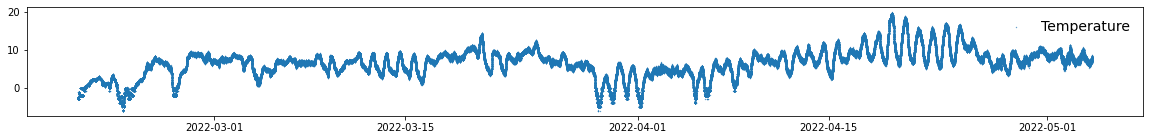

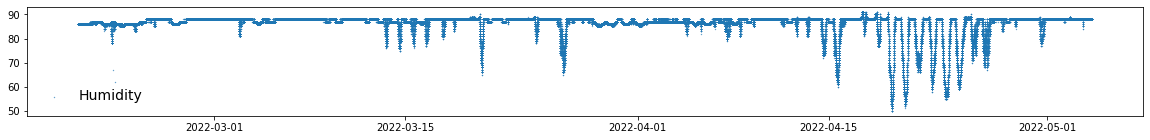

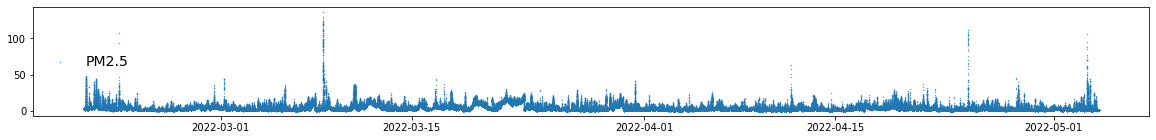

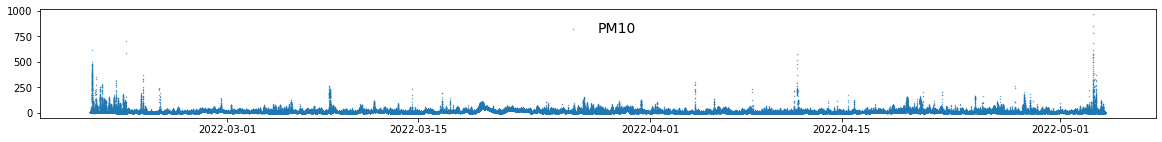

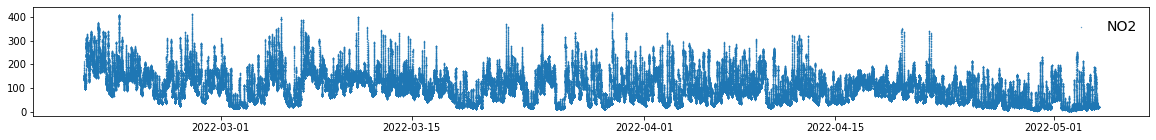

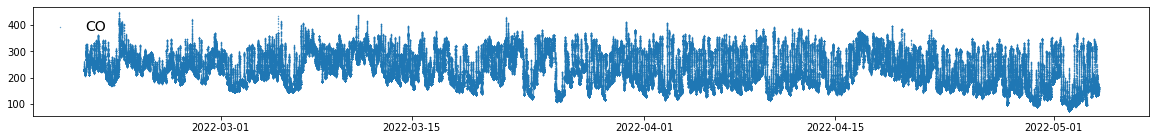

In [22]:
for feature in df.columns:
    print('Feature: ', feature)
    
    plt.figure( figsize=(20, 2) )
    plt.scatter(x = df.index, y = df[feature], s = 0.1)
    plt.legend([ feature ], frameon = False, fontsize = 14)

# Data cleaning

## Cleaning process

**Findings**: 

- Replace negative values with NaN
- Outlier removal - Method: STD

In [33]:
for feature in ['PM2.5', 'PM10', 'NO2', 'CO']:
    df[feature] = df[feature].apply(lambda x: np.NaN if (x < 0) else x)
    
   
# Feature: PM2.5 - Method: STD 
print('Feature: PM2.5 (Removing outliers)')
df[ 'PM2.5' ] = detect_outliers( df[ 'PM2.5' ].to_numpy(), Method = 'STD', verbose = False)

# Feature: PM10 - Method: STD 
print('Feature: PM10 (Removing outliers)')
df[ 'PM10' ] = detect_outliers( df[ 'PM10' ].to_numpy(), Method = 'STD', verbose = False)

# # Feature: NO2 - Method: STD 
# print('Feature: NO2')
# df[ 'NO2' ] = detect_outliers( df[ 'NO2' ].to_numpy(), Method = 'STD', verbose = False)

# # Feature: CO -  Method: STD 
# print('Feature: CO')
# df[ 'CO' ] = detect_outliers( df[ 'CO' ].to_numpy(), Method = 'STD', verbose = False)

Feature: PM2.5
Feature: PM10


## Visualization

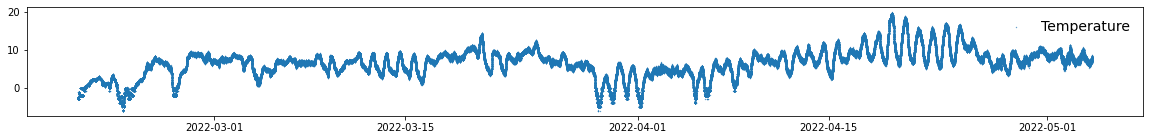

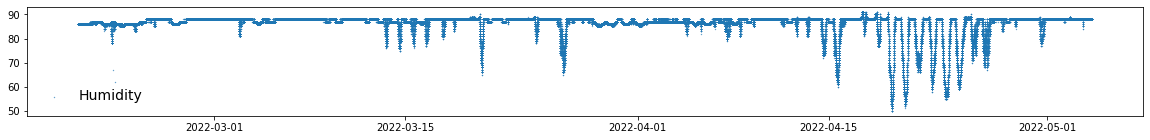

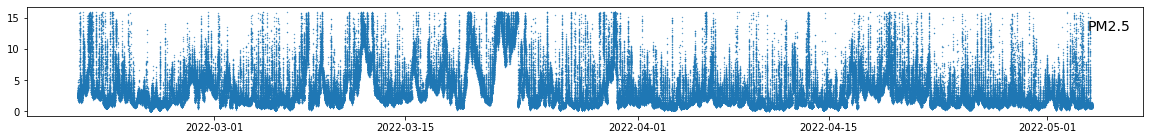

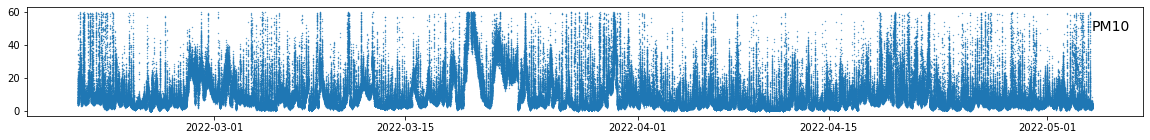

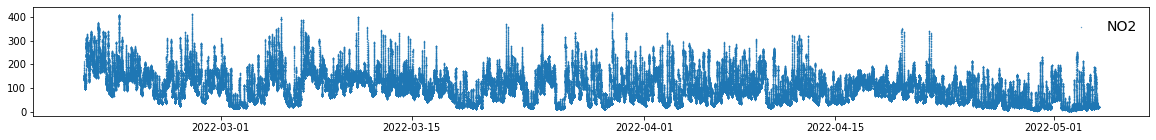

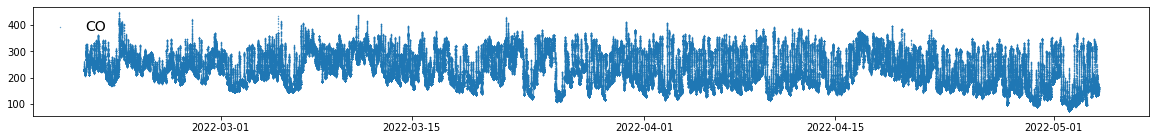

In [34]:
for feature in df.columns:
   
    plt.figure( figsize=(20, 2) )
    plt.scatter(x = df.index, y = df[feature], s = 0.1)
    plt.legend([ feature ], frameon = False, fontsize = 14)

# Save data

In [35]:
try:
    df.to_csv('metadata/7-kanal-1.csv')

    print('[INFO] Data have been successfully saved')
except:
    print('[ERROR] Data have been saved')

[INFO] Data have been successfully saved
